In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df= pd.read_csv('FuelConsumption.csv')

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [6]:
x= cdf.iloc[:, :-1].values
y= cdf.iloc[:, -1].values
print(x)
print(y)

[[ 2.   4.   9.9  6.7  8.5]
 [ 2.4  4.  11.2  7.7  9.6]
 [ 1.5  4.   6.   5.8  5.9]
 ...
 [ 3.   6.  13.4  9.8 11.8]
 [ 3.2  6.  12.9  9.3 11.3]
 [ 3.2  6.  14.9 10.2 12.8]]
[196 221 136 ... 271 260 294]


<AxesSubplot:>

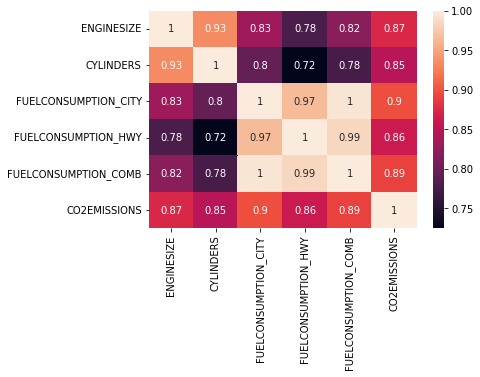

In [8]:
import seaborn as sns
sns.heatmap(cdf.corr(),annot=True)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [11]:
y_pred= regressor.predict(x_test)
x_pred= regressor.predict(x_train)

In [13]:
print('Coefficients: ', regressor.coef_)
print(regressor.intercept_)

Coefficients:  [ 10.8547316    7.65914224 -11.21595269 -10.47231908  31.14100197]
64.88135054065862


In [14]:


print('Residual sum squares: %.2f' % np.mean((y_pred - y_test) **2 ))

Residual sum squares: 617.32


0.8426468641660053


<AxesSubplot:>

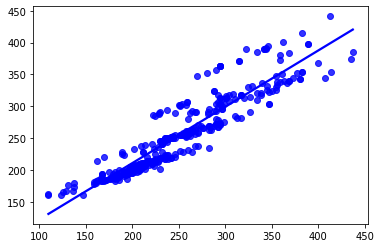

In [16]:
print(regressor.score(x_test, y_test))


sns.regplot(x=y_test, y=y_pred, ci=None, color="b")





/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

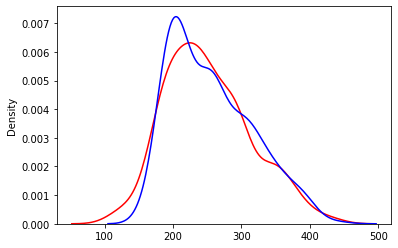

In [17]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


In [18]:
x= cdf.iloc[:, :3].values
y= cdf.iloc[:, -1].values
print(x)
print(y)

[[ 2.   4.   9.9]
 [ 2.4  4.  11.2]
 [ 1.5  4.   6. ]
 ...
 [ 3.   6.  13.4]
 [ 3.2  6.  12.9]
 [ 3.2  6.  14.9]]
[196 221 136 ... 271 260 294]


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)


In [21]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [22]:
y_pred= regressor.predict(x_test)


In [23]:
print(regressor.score(x_test, y_test))

0.8418565610806696
